 #  A Whale off the Port(folio)

In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns=pd.read_csv(whale_returns_csv)
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True), inplace=True)
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.drop(columns=['Date'], inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns=pd.read_csv(algo_returns_csv)
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format=True), inplace=True)
algo_returns.head()

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.drop(columns=['Date'], inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data.

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history=pd.read_csv(sp500_history_csv)
sp500_history.set_index(pd.to_datetime(sp500_history['Date'], infer_datetime_format=True), inplace=True)
sp500_history.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06


In [9]:
sp500_history=sp500_history.sort_index(ascending=True)
sp500_history.head()

,Date,Close
Date,,
2012-10-01,1-Oct-12,$1444.49
2012-10-02,2-Oct-12,$1445.75
2012-10-03,3-Oct-12,$1450.99
2012-10-04,4-Oct-12,$1461.40
2012-10-05,5-Oct-12,$1460.93


In [10]:
# Check Data Types
sp500_history.dtypes

Date     object
Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$', "")
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.drop(columns=['Date'], inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename Column
columns = ["S&P_500"]
sp500_returns.columns = columns
sp500_returns.head()

,S&P_500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
combined_returns = pd.concat([whale_returns, algo_returns,sp500_returns], axis='columns', join='inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500?

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

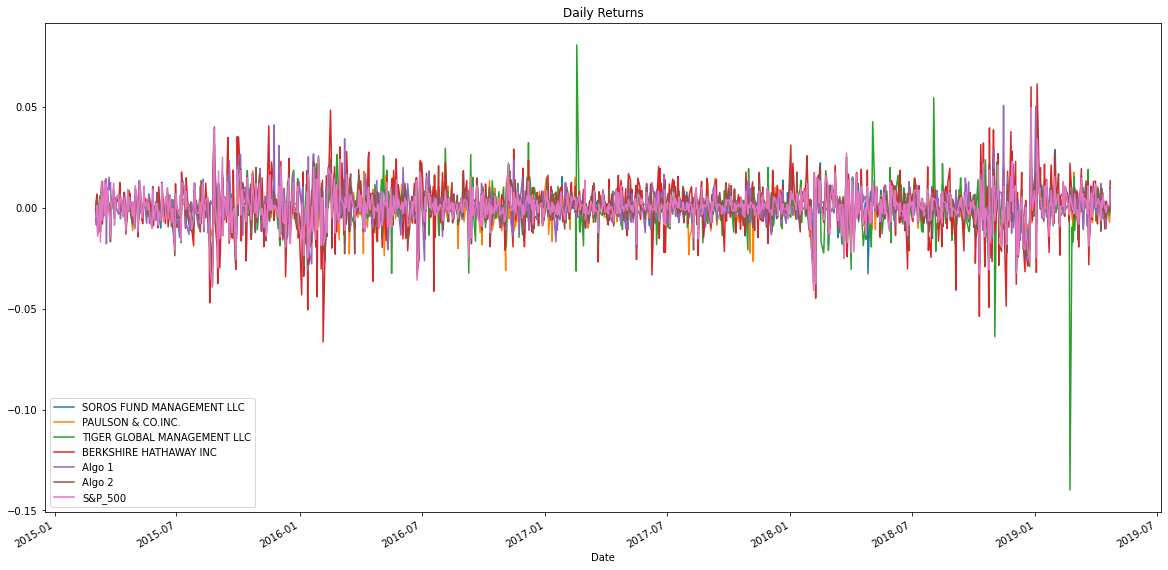

In [16]:
# Plot daily returns
combined_returns.plot(figsize=(20,10), title='Daily Returns')

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

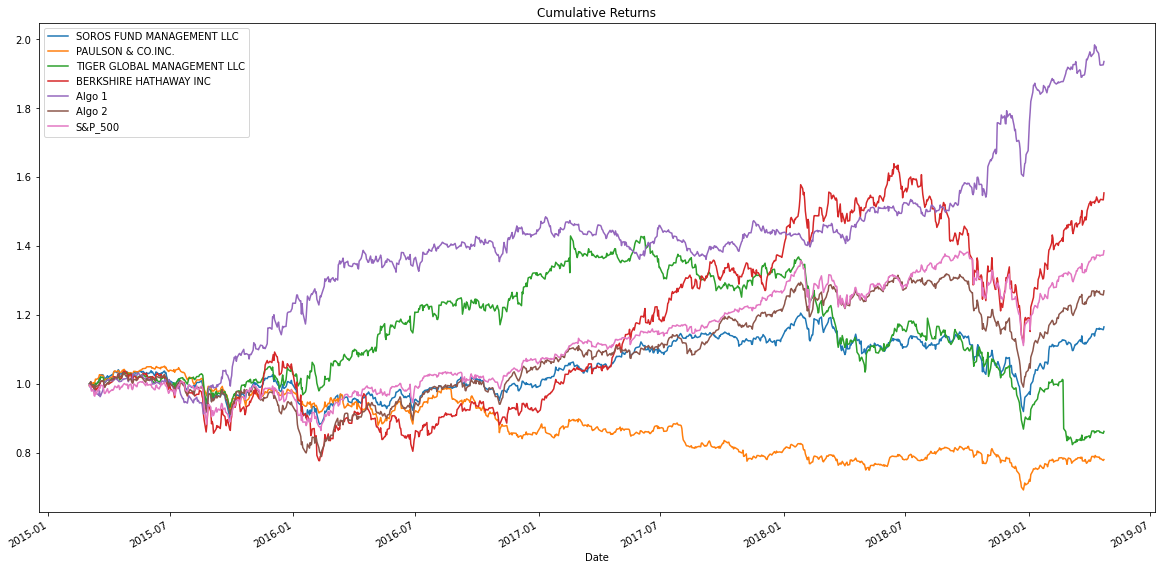

In [17]:
# Plot cumulative returns
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns')

Algo 1 was the best performing portfolio; Berkshire Hathaway was the second best. Both porfolios outperformed the S&P 500.

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:title={'center':'Portfolio Risk'}>

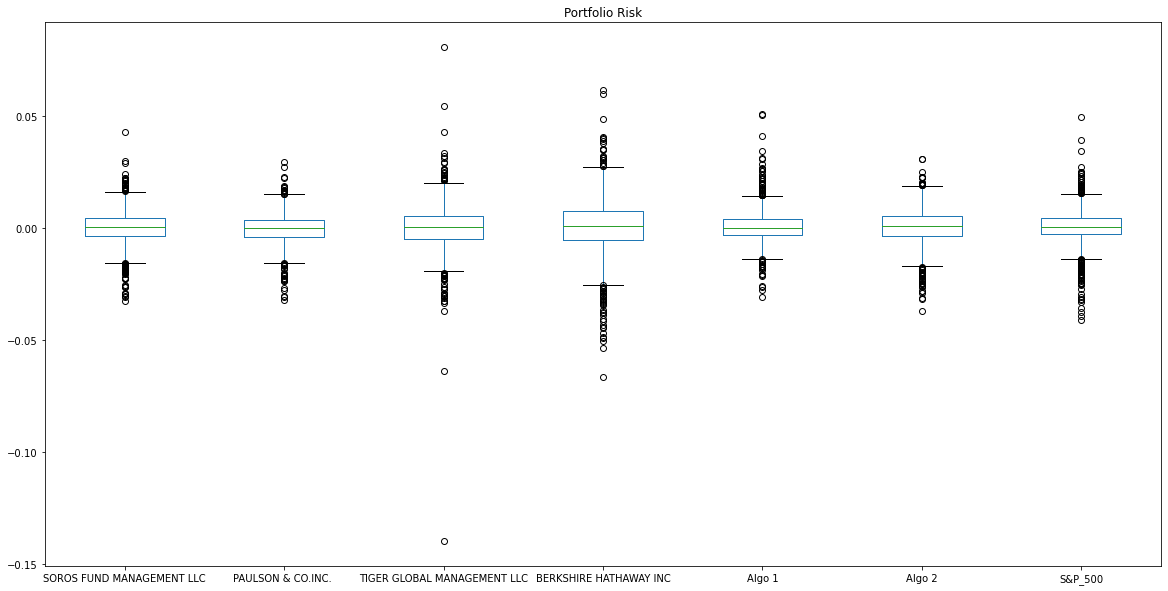

In [18]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(20,10), title='Portfolio Risk')

Tiger Global Management had the largest spread. Paulson & Co. had the smallest spread.

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P_500                        0.008554
dtype: float64

In [20]:
for i in range(0, 6):
    if daily_std[daily_std.index[i]] > daily_std["S&P_500"]:
       print(f"{daily_std.index[i]}   True")
    else:
       print(f"{daily_std.index[i]}   False") #padding

SOROS FUND MANAGEMENT LLC   False
PAULSON & CO.INC.    False
TIGER GLOBAL MANAGEMENT LLC   True
BERKSHIRE HATHAWAY INC   True
Algo 1   False
Algo 2   False


Tiger Global Management and Bershire Hathway were risker than S&P 500.

In [46]:
sp_risk = combined_returns["S&P_500"].std()

In [48]:
combined_returns.std() > sp_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P_500                        False
dtype: bool

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P_500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

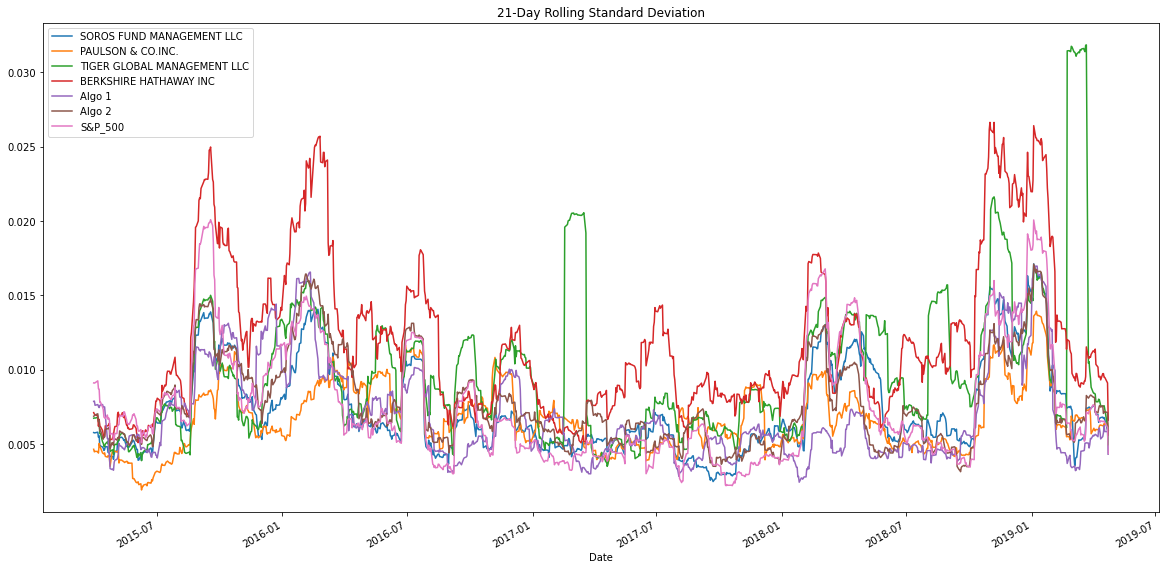

In [23]:
# Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 trading day window
combined_returns.rolling(window=21).std().plot(figsize=(20,10), title='21-Day Rolling Standard Deviation')

In general, when the risk increased in the S&P 500, the risk also increased for the other portfolios, though by different magnitude.

In [24]:
# Construct a correlation table
correlation = combined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P_500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


Returns of Algo 2 most closely mimicked the S&P 500.

<AxesSubplot:title={'center':'Rolling 21-Day Algo 1 Beta'}, xlabel='Date'>

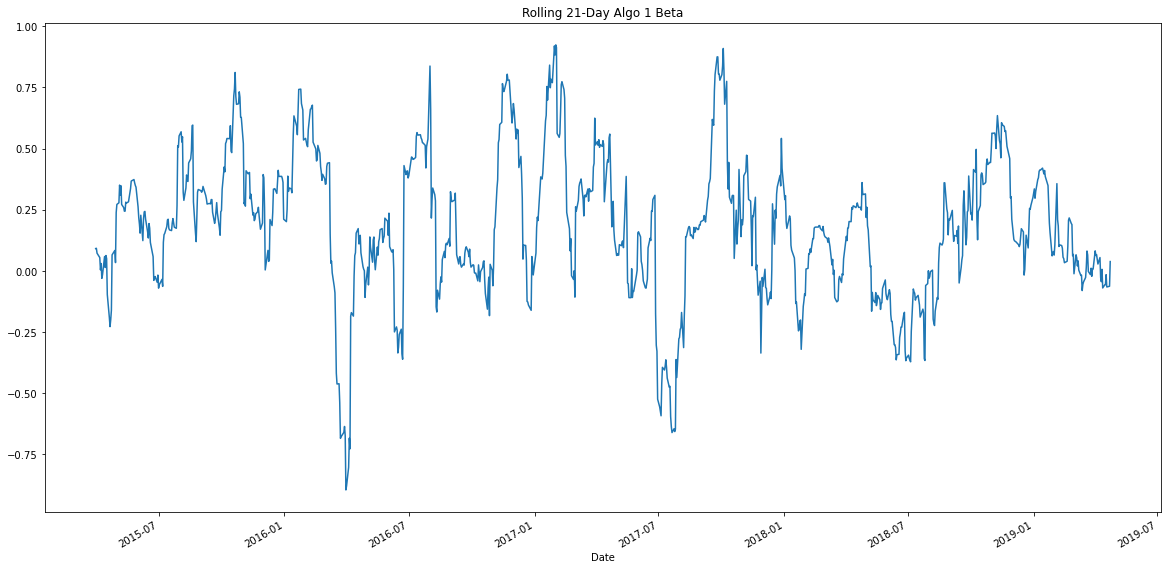

In [25]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
rolling_covariance = combined_returns['Algo 1'].rolling(window=21).cov(combined_returns['S&P_500'])
rolling_variance = combined_returns['S&P_500'].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Algo 1 Beta')

Algo 1 was not very sensitive to the movement of S&P 500.

<AxesSubplot:title={'center':'21-Day EMA Standard Deviation'}, xlabel='Date'>

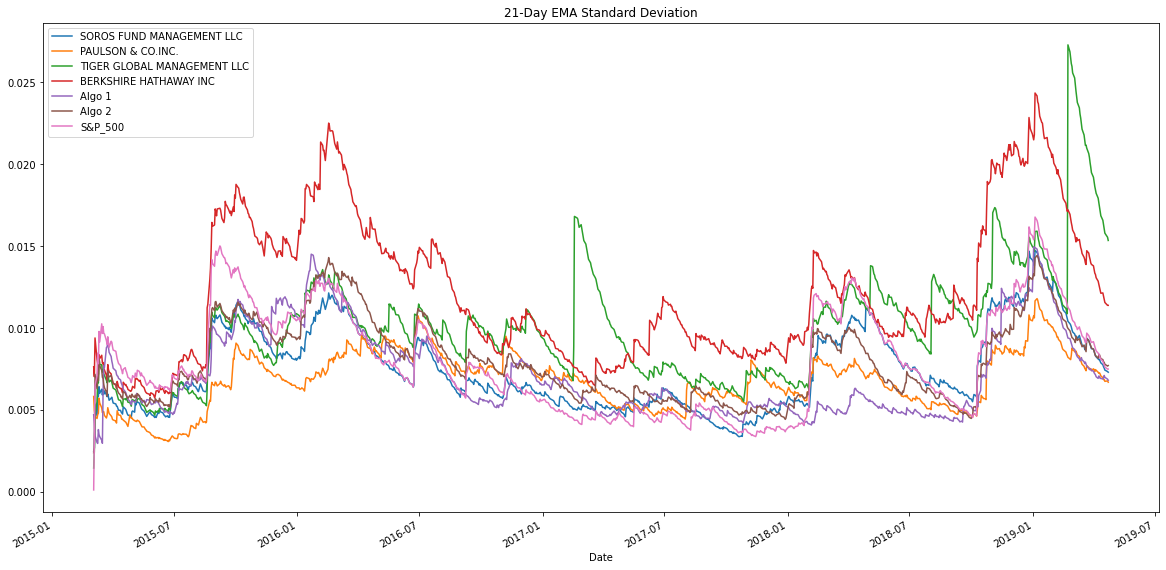

In [26]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_ema_20 = combined_returns.ewm(halflife=21).std()
combined_ema_20.plot(figsize=(20,10), title='21-Day EMA Standard Deviation')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [27]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P_500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

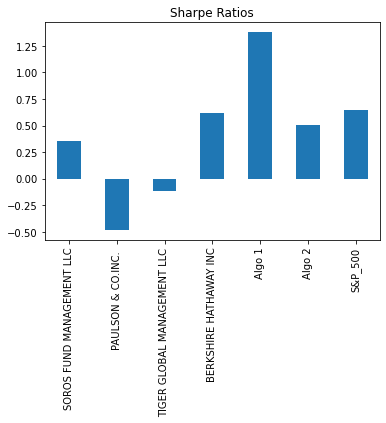

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, Algo 1 out-performed both 'the market' and the whales.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Read the first stock
shop_data = Path("Resources/shop_historical.csv")
shop = pd.read_csv(
   shop_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
shop.sort_index(inplace=True)
shop.head()

,Symbol,NOCP
Trade DATE,,
2015-05-21,SHOP,25.68
2015-05-22,SHOP,28.31
2015-05-26,SHOP,29.65
2015-05-27,SHOP,27.50
2015-05-28,SHOP,27.45


In [30]:
# Read the second stock
twlo_data = Path("Resources/twlo_historical.csv")
twlo = pd.read_csv(
   twlo_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
twlo.sort_index(inplace=True)
twlo.head()

,Symbol,NOCP
Trade DATE,,
2016-06-23,TWLO,28.79
2016-06-24,TWLO,26.30
2016-06-27,TWLO,27.25
2016-06-28,TWLO,29.92
2016-06-29,TWLO,37.08


In [31]:
# Read the third stock
sq_data = Path("Resources/sq_historical.csv")
sq = pd.read_csv(
   sq_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
sq.sort_index(inplace=True)
sq.head()

,Symbol,NOCP
Trade DATE,,
2015-11-19,SQ,13.07
2015-11-20,SQ,12.85
2015-11-23,SQ,12.12
2015-11-24,SQ,12.02
2015-11-25,SQ,11.90


In [32]:
# Concatenate all stocks into a single DataFrame
my_portfolio = pd.concat([shop, twlo, sq], axis='rows', join='inner')
my_portfolio.head()

,Symbol,NOCP
Trade DATE,,
2015-05-21,SHOP,25.68
2015-05-22,SHOP,28.31
2015-05-26,SHOP,29.65
2015-05-27,SHOP,27.50
2015-05-28,SHOP,27.45


In [33]:
# Reset the index
my_portfolio = my_portfolio.reset_index()
my_portfolio.head()

,Trade DATE,Symbol,NOCP
0,2015-05-21,SHOP,25.68
1,2015-05-22,SHOP,28.31
2,2015-05-26,SHOP,29.65
3,2015-05-27,SHOP,27.50
4,2015-05-28,SHOP,27.45


In [34]:
# Pivot so that each column of prices represents a unique symbol
my_portfolio = my_portfolio.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
my_portfolio.head()

Symbol,SHOP,SQ,TWLO
Trade DATE,,,
2015-05-21,25.68,NaN,NaN
2015-05-22,28.31,NaN,NaN
2015-05-26,29.65,NaN,NaN
2015-05-27,27.50,NaN,NaN
2015-05-28,27.45,NaN,NaN


In [35]:
# Drop Nulls
my_portfolio.dropna(inplace=True)
my_portfolio.head()

Symbol,SHOP,SQ,TWLO
Trade DATE,,,
2016-06-23,31.20,9.13,28.79
2016-06-24,29.07,8.77,26.30
2016-06-27,27.16,8.62,27.25
2016-06-28,28.54,8.90,29.92
2016-06-29,30.32,9.30,37.08


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Calculate weighted portfolio returns
custom_returns = my_portfolio.pct_change()
shop_weight = 1/3
twlo_weight = 1/3
sq_weight = 1/3
my_portfolio_returns = shop_weight * custom_returns["SHOP"] + twlo_weight * custom_returns["TWLO"] + sq_weight * custom_returns["SQ"]
my_portfolio_returns.head()

Trade DATE
2016-06-23         NaN
2016-06-24   -0.064729
2016-06-27   -0.015562
2016-06-28    0.060425
2016-06-29    0.115539
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_returns = pd.concat([combined_returns, my_portfolio_returns], axis='columns', join='inner')
all_returns = all_returns.rename(columns={0: "Custom"})
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500,Custom
2016-06-23,0.009902,0.013068,0.014758,0.014885,0.009213,0.013319,0.013364,NaN
2016-06-24,-0.030826,-0.027631,-0.033416,-0.032438,-0.021664,-0.028199,-0.035920,-0.064729
2016-06-27,-0.020229,-0.020417,-0.007787,-0.025191,-0.003003,-0.024794,-0.018097,-0.015562
2016-06-28,0.013727,0.022680,0.013722,0.017600,0.008004,0.020240,0.017770,0.060425
2016-06-29,0.011493,0.012637,0.017118,0.023445,0.008125,0.017175,0.017033,0.115539


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna(inplace=True)
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500,Custom
2016-06-24,-0.030826,-0.027631,-0.033416,-0.032438,-0.021664,-0.028199,-0.035920,-0.064729
2016-06-27,-0.020229,-0.020417,-0.007787,-0.025191,-0.003003,-0.024794,-0.018097,-0.015562
2016-06-28,0.013727,0.022680,0.013722,0.017600,0.008004,0.020240,0.017770,0.060425
2016-06-29,0.011493,0.012637,0.017118,0.023445,0.008125,0.017175,0.017033,0.115539
2016-06-30,0.007980,0.003114,0.021142,0.009472,0.000309,0.010475,0.013565,-0.009337


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [39]:
# Risk
all_daily_std = all_returns.std()
all_daily_std

SOROS FUND MANAGEMENT LLC      0.007660
PAULSON & CO.INC.              0.007020
TIGER GLOBAL MANAGEMENT LLC    0.011547
BERKSHIRE HATHAWAY INC         0.012184
Algo 1                         0.006717
Algo 2                         0.007664
S&P_500                        0.007954
Custom                         0.025905
dtype: float64

Custom was the riskest portfolio.

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}>

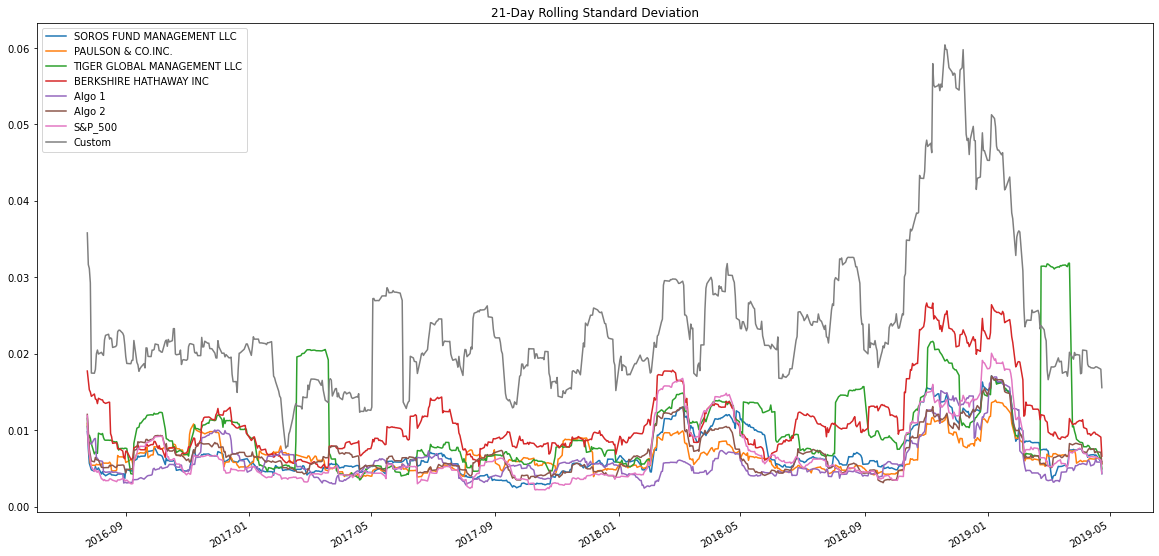

In [40]:
# Rolling
all_returns.rolling(window=21).std().plot(figsize=(20,10), title='21-Day Rolling Standard Deviation')

In [41]:
# Annualized Sharpe Ratios
all_sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.589482
PAULSON & CO.INC.             -0.493360
TIGER GLOBAL MANAGEMENT LLC   -0.541380
BERKSHIRE HATHAWAY INC         1.197965
Algo 1                         1.189248
Algo 2                         0.924747
S&P_500                        0.984187
Custom                         1.929133
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

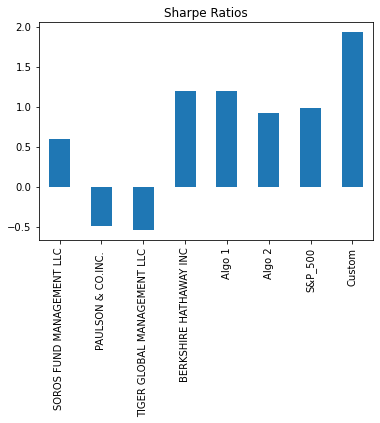

In [42]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

Custom had the highest sharp ratio.

In [43]:
# Create a correlation analysis
all_correlation = all_returns.corr()
all_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.662228,0.494912,0.760320,0.290067,0.794936,0.817270,0.588161
PAULSON & CO.INC.,0.662228,1.000000,0.393434,0.537788,0.273644,0.695703,0.674335,0.435901
TIGER GLOBAL MANAGEMENT LLC,0.494912,0.393434,1.000000,0.362211,0.112494,0.438608,0.550854,0.233587
BERKSHIRE HATHAWAY INC,0.760320,0.537788,0.362211,1.000000,0.251245,0.705975,0.775539,0.678294
Algo 1,0.290067,0.273644,0.112494,0.251245,1.000000,0.289808,0.267157,0.200519
Algo 2,0.794936,0.695703,0.438608,0.705975,0.289808,1.000000,0.864392,0.605603
S&P_500,0.817270,0.674335,0.550854,0.775539,0.267157,0.864392,1.000000,0.624166
Custom,0.588161,0.435901,0.233587,0.678294,0.200519,0.605603,0.624166,1.000000


Algo 1 still had the lowest correlation to the S&P 500.

<AxesSubplot:title={'center':'Rolling 21-Day Custom Beta'}>

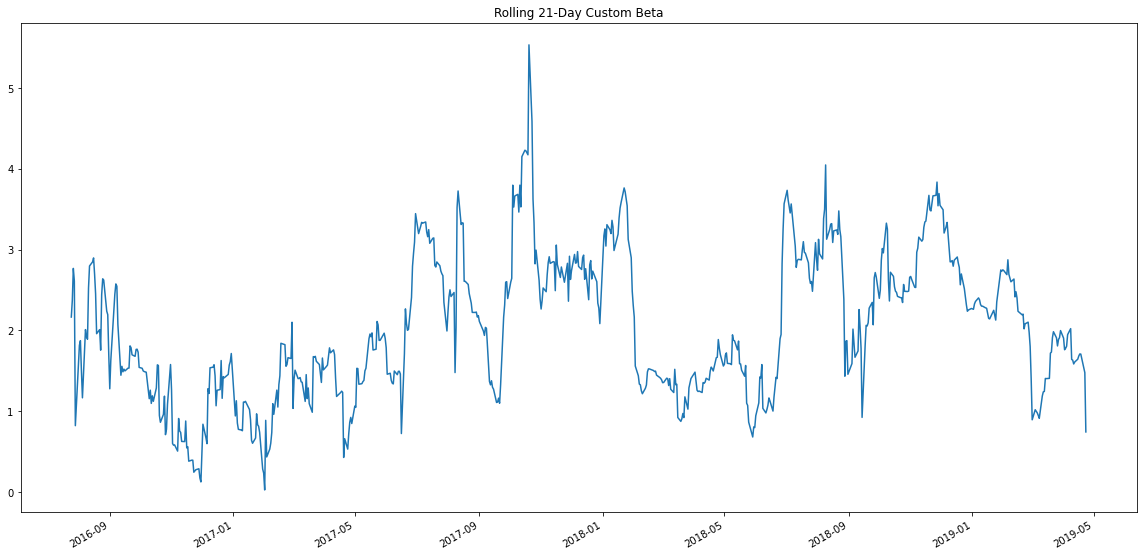

In [44]:
# Beta
all_rolling_covariance = all_returns['Custom'].rolling(window=21).cov(all_returns['S&P_500'])
all_rolling_variance = all_returns['S&P_500'].rolling(window=21).var()
all_rolling_beta = all_rolling_covariance / all_rolling_variance
all_rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Custom Beta')

<AxesSubplot:title={'center':'Cumulative Returns'}>

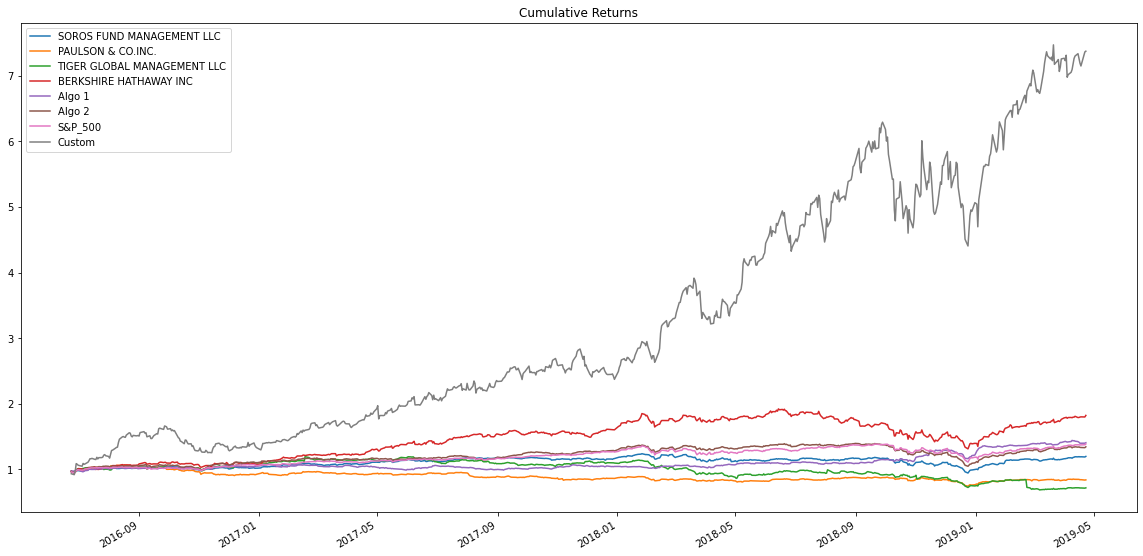

In [45]:
# Plot cumulative returns
cumulative_all_returns = (1 + all_returns).cumprod()
cumulative_all_returns.plot(figsize=(20,10), title='Cumulative Returns')

Custom had the highest cumulative return, outperforming all other portfolios and the S&P 500.